In [28]:
import pandas as pd

In [64]:
# Load data
df = pd.read_csv('total_debt_service_reserves_and_tax_revenue.csv')

# Data Cleaning

In [65]:
df.head()

,Unnamed: 0,2006,2007,2008,2009,2010,2011,2012
0,"Total Debt Service (% of exports of goods, ser...",48.407562,45.82853,54.258951,79.02521,63.57455,57.408537,57.558601
1,"Total Reserves (includes golds, current US$) b...",4005.400000,4956.40000,3639.800000,7030.40000,8620.80000,7989.500000,8584.922580
2,Tax Revenue (% of GDP) by Year,14.600000,14.20000,13.300000,12.80000,12.90000,12.400000,11.100000


We can identify the numeric and non-numeric columns. These are necessary since we often treat them using different methods.

In [66]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)


Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012'], dtype='object')


In [67]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Unnamed: 0'], dtype='object')


Here due to decimal places or formatting floating values shows as non_numeric_cols. so will convert the data as float first

### Missing data
Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

Method #1: missing data (by columns) count & percentage
This is the most basic method to detect missing data among columns. We print out the summary of all the non-numeric columns below. By looking at the Non-Null Count, we can spot the number of missing data by columns. For our example, all non-null counts should be same as the total number of rows, so there are no missing data among the non-numeric columns!

In [68]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [69]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    3 non-null      float64
 1   2007    3 non-null      float64
 2   2008    3 non-null      float64
 3   2009    3 non-null      float64
 4   2010    3 non-null      float64
 5   2011    3 non-null      float64
 6   2012    3 non-null      float64
dtypes: float64(7)
memory usage: 300.0 bytes


In [70]:
num_missing = df.isna().sum()
num_missing

Unnamed: 0    0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
dtype: int64

###### Method #2: missing data (by columns) heatmap
The seaborn library is a popular statistical data visualization library. Let’s first use it to plot the missing data heatmap.

<Axes: >

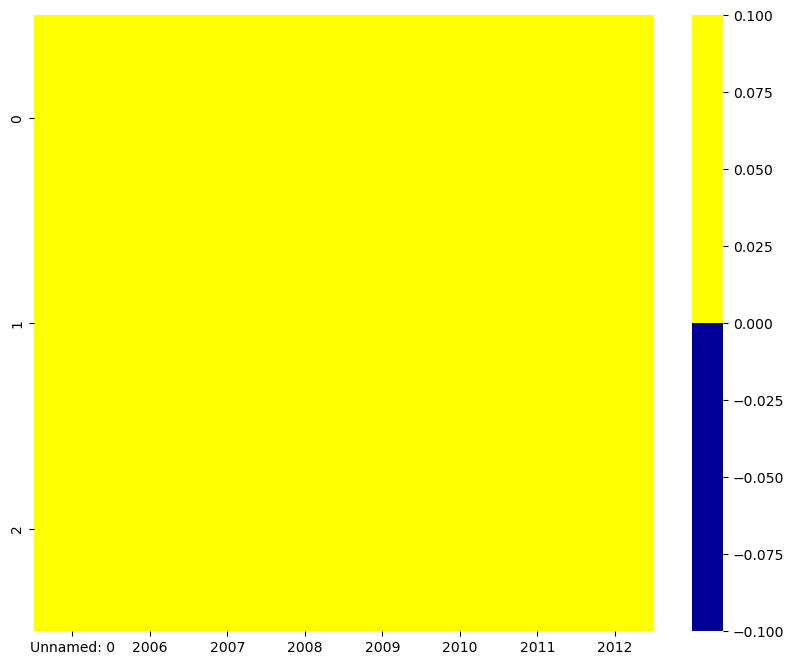

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

###### What to do?
There are NO agreed-upon solutions to dealing with missing data. We have to study the dataset and its specific columns to determine how to clean their missing values.

Technique #1: drop columns / features
We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative.

->In this data set, non of the column is not informative. so not dropping any.

Technique #2: drop rows / observations
We can drop the entire row with missing data like the first technique. Again, please be aware of the loss of information when removing rows.

->In this data set, non of the rows is not informative. so not dropping any.

Technique #3: impute the missing with constant values
Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values. For example, we can impute the numeric columns with a value of -999 and impute the non-numeric columns with ‘_MISSING_’.


Technique #4: impute the missing with statistics
Besides constants, we can also impute the missing values with statistics. For example, we can impute the numeric columns with their respective medians.

####We can also impute the non-numeric columns with their most frequent values. Then we can use it to fill in the missing.

-> Our data set is clean and small so not using any. 
-> only renaming the columns for a meaning full representaions
-> and Types to shorter names to imrpvove the visuals



In [80]:
df.head()

,Unnamed: 0,2006,2007,2008,2009,2010,2011,2012
0,"Total Debt Service (% of exports of goods, ser...",48.407562,45.82853,54.258951,79.02521,63.57455,57.408537,57.558601
1,"Total Reserves (includes golds, current US$) b...",4005.400000,4956.40000,3639.800000,7030.40000,8620.80000,7989.500000,8584.922580
2,Tax Revenue (% of GDP) by Year,14.600000,14.20000,13.300000,12.80000,12.90000,12.400000,11.100000


In [83]:
df.rename(columns={'Unnamed: 0': 'Types'}, inplace=True)

# Rename columns
df.rename(columns={'2006': 'Year_2006', '2007': 'Year_2007', '2008': 'Year_2008',
                     '2009': 'Year_2009', '2010': 'Year_2010', '2011': 'Year_2011',
                     '2012': 'Year_2012'}, inplace=True)




new_names = ['Total Debt Service', 'Total Reserves ', 'Tax Revenue'] 

# Assign the new names to the index
df.iloc[:, 0] = new_names

df

,Types,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012
0,Total Debt Service,48.407562,45.82853,54.258951,79.02521,63.57455,57.408537,57.558601
1,Total Reserves,4005.400000,4956.40000,3639.800000,7030.40000,8620.80000,7989.500000,8584.922580
2,Tax Revenue,14.600000,14.20000,13.300000,12.80000,12.90000,12.400000,11.100000


### Unnecessary data

Unnecessary type #1: repetitive & uninformative

 -> there is no such data in this dataset
 
Duplicates type #1: all columns based
How to find out?
This is easy to understand. Such duplicate occurs when all the columns’ values within the observations are the same.

We can use the duplicated method to grab the boolean values of whether a row is duplicated, and then use it to filter for duplicated rows from df.

We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates. 
 

In [123]:
df[df.duplicated()]
df.drop_duplicates()
df

,Types,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012
0,Total Debt Service,48.407562,45.82853,54.258951,79.02521,63.57455,57.408537,57.558601
1,Total Reserves,4005.400000,4956.40000,3639.800000,7030.40000,8620.80000,7989.500000,8584.922580
2,Tax Revenue,14.600000,14.20000,13.300000,12.80000,12.90000,12.400000,11.100000


#### Inconsistent data

Inconsistent type #1: capitalization
Inconsistent use of upper and lower cases in categorical values is typical. We need to clean it since Python is case-sensitive.

Inconsistent type #2: data types
Another standardization we often need to look at is the data types.

-> there is no such data in this dataset

# 4-step data analysis process

#### Descriptive Analysis:
Descriptive analysis involves summarizing and describing the main characteristics of the dataset.


In [84]:
##### Descriptive statistics
print(df.describe())
#####Display the first few rows of the dataset
print(df.head())

         Year_2006    Year_2007    Year_2008    Year_2009    Year_2010  \
count     3.000000     3.000000     3.000000     3.000000     3.000000   
mean   1356.135854  1672.142843  1235.786317  2374.075070  2899.091517   
std    2294.392321  2844.294094  2082.037644  4032.631627  4955.209678   
min      14.600000    14.200000    13.300000    12.800000    12.900000   
25%      31.503781    30.014265    33.779476    45.912605    38.237275   
50%      48.407562    45.828530    54.258951    79.025210    63.574550   
75%    2026.903781  2501.114265  1847.029476  3554.712605  4342.187275   
max    4005.400000  4956.400000  3639.800000  7030.400000  8620.800000   

         Year_2011    Year_2012  
count     3.000000     3.000000  
mean   2686.436179  2884.527060  
std    4592.643124  4936.741983  
min      12.400000    11.100000  
25%      34.904268    34.329301  
50%      57.408537    57.558601  
75%    4023.454268  4321.240591  
max    7989.500000  8584.922580  
                Types    Ye

# Visualization

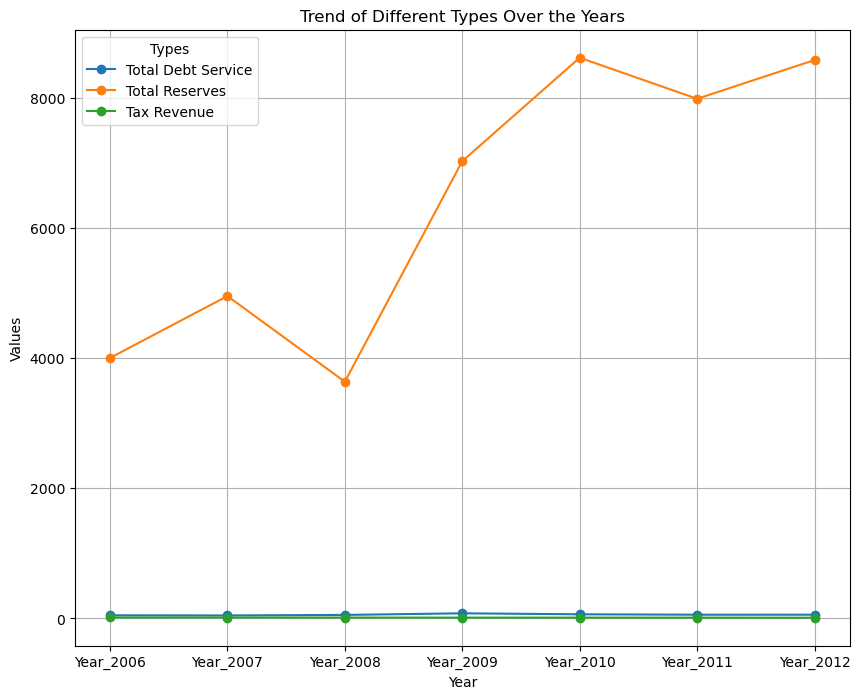

In [87]:
import matplotlib.pyplot as plt

# Plotting each type over the years
df.set_index('Types').T.plot(marker='o', figsize=(10, 8))
plt.title('Trend of Different Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Types')
plt.grid(True)
plt.show()

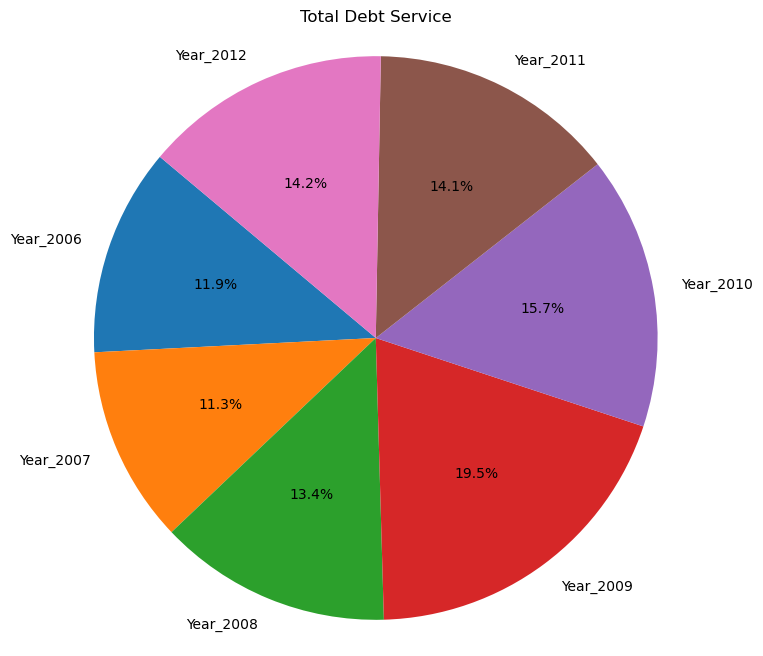

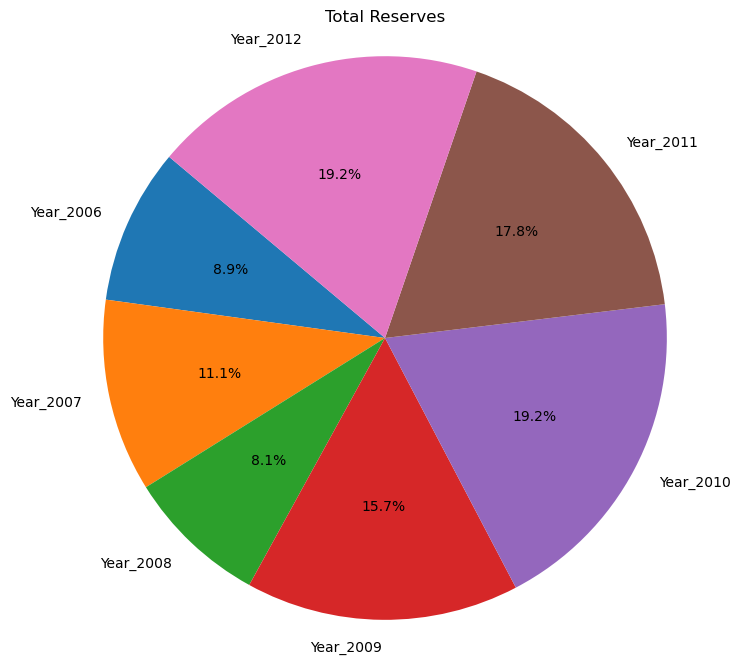

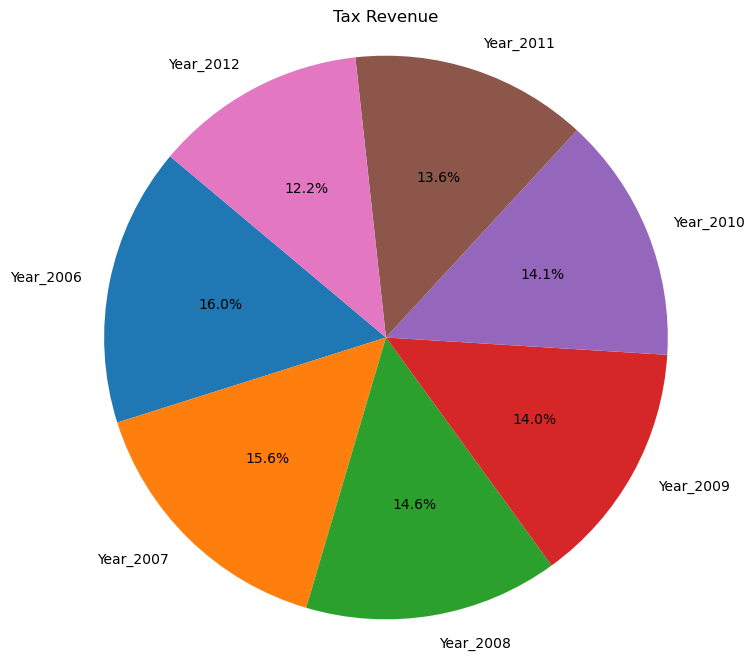

In [124]:
import matplotlib.pyplot as plt

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract data for the pie chart
    labels = df.columns[1:]  # Years
    values = row[1:]         # Data values for each year

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(row['Types'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Showing the plot
    plt.show()

###### Radar charts

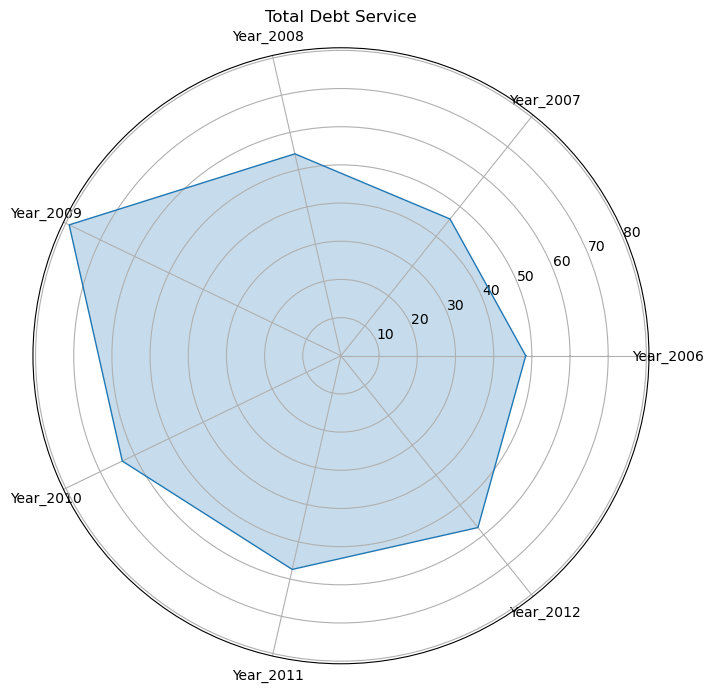

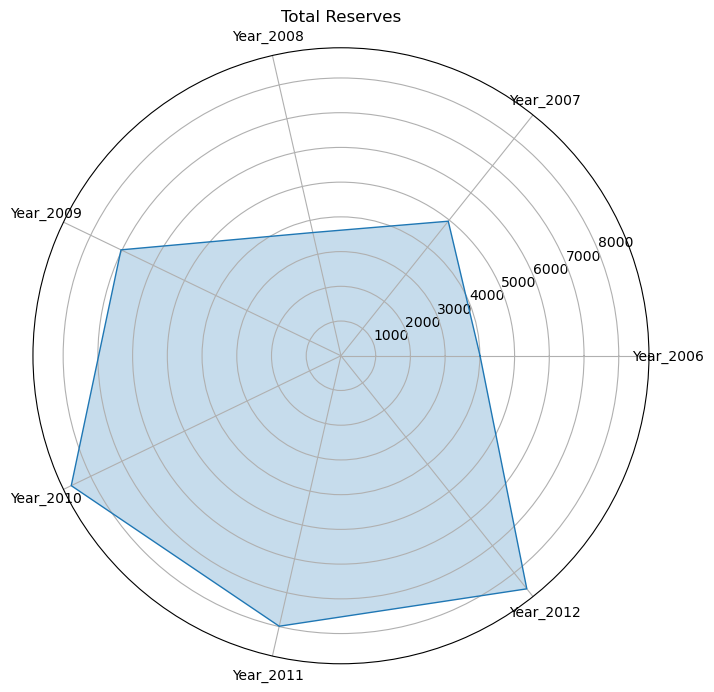

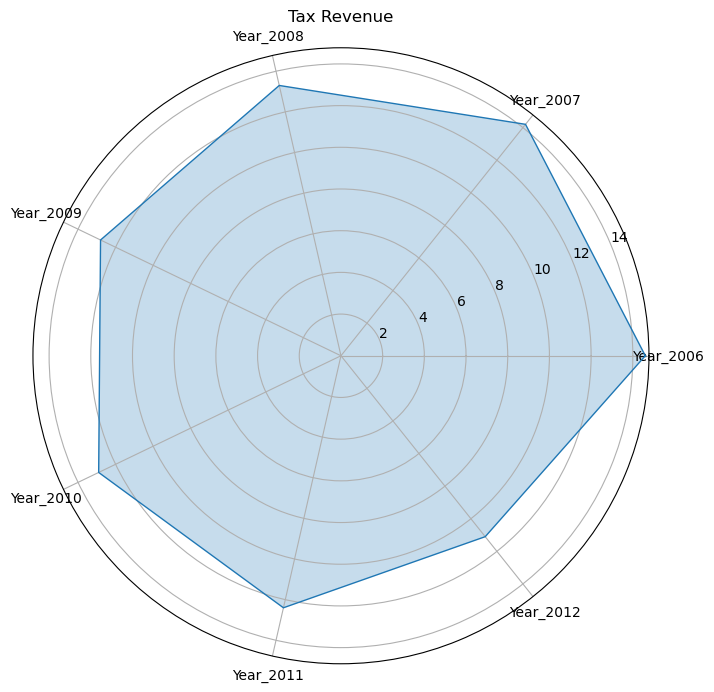

In [125]:
# Define function to plot radar chart
def radar_chart(ax, labels, values, title):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Repeat the first value to close the circle
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Set the labels along the angles
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Add title
    ax.set_title(title)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract data for the radar chart
    labels = df.columns[1:]  # Years
    values = row[1:].values.tolist()  # Data values for each year

    # Plotting the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    radar_chart(ax, labels, values, row['Types'])

    # Showing the plot
    plt.show()

###### Donut charts visuals for the 3 types

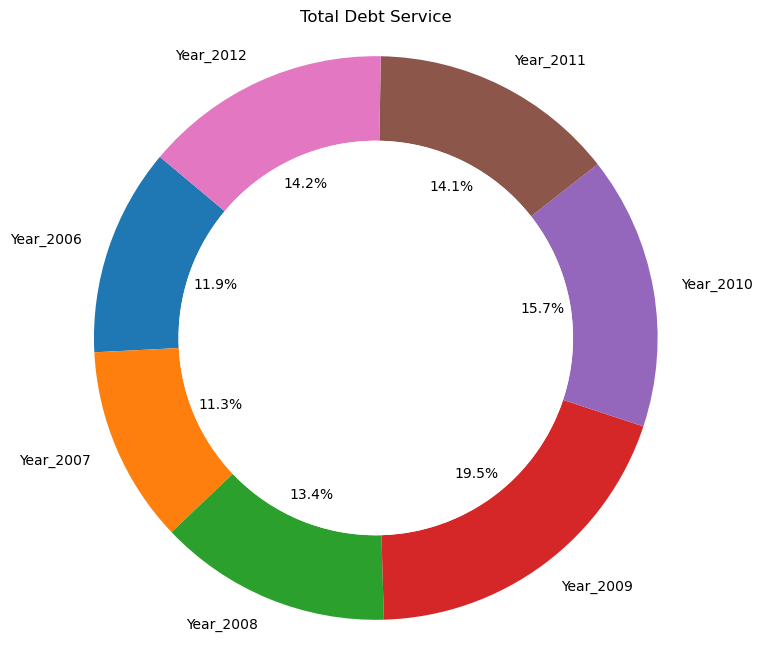

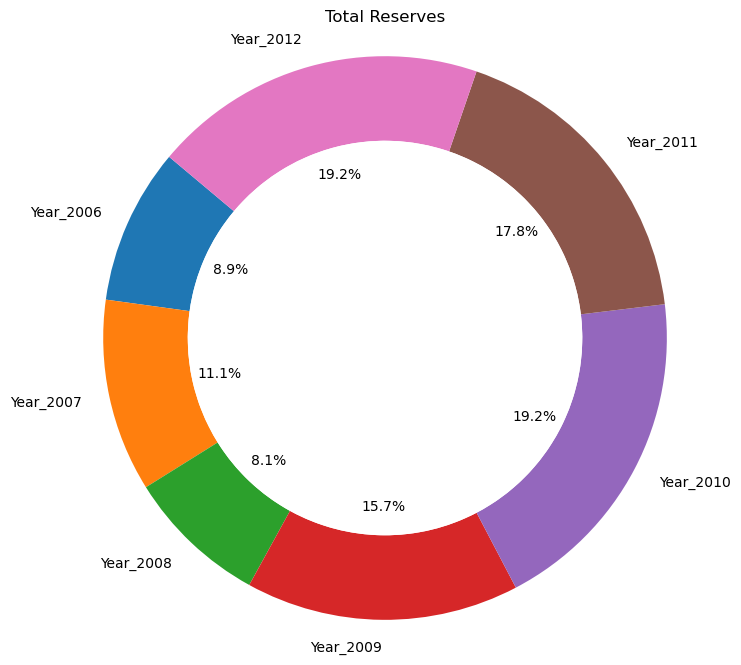

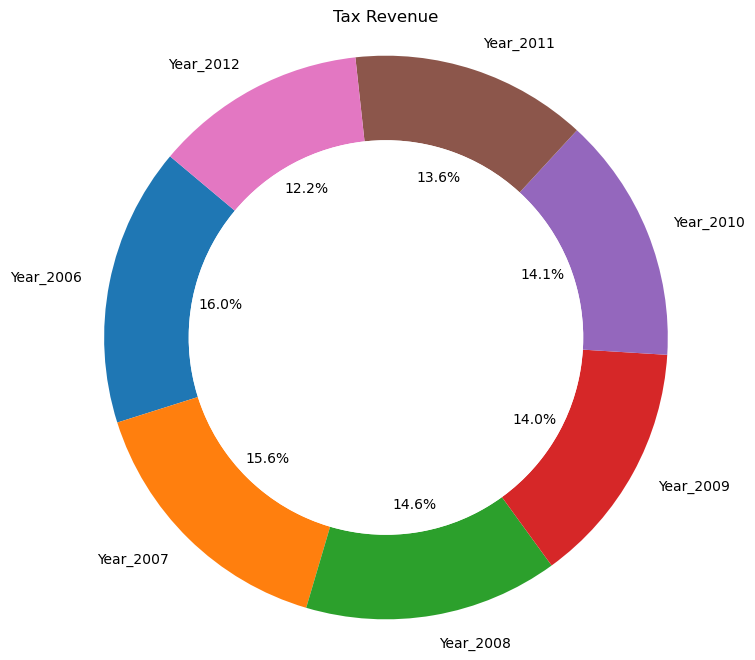

In [126]:

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Extract data for the donut chart
    labels = df.columns[1:]  # Years
    values = row[1:]         # Data values for each year

    # Plotting the donut chart
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    plt.title(row['Types'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Drawing a white circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Showing the plot
    plt.show()

# Diagnostic Analysis:
Diagnostic analysis aims to identify patterns, relationships, and anomalies in the dataset. This often involves correlation analysis and outlier detection.

In [89]:
# Correlation Analysis (excluding non-numeric columns)
correlation_matrix = df.drop('Types', axis=1).corr()
print(correlation_matrix)

           Year_2006  Year_2007  Year_2008  Year_2009  Year_2010  Year_2011  \
Year_2006   1.000000   0.999998   0.999997   1.000000   0.999997   0.999997   
Year_2007   0.999998   1.000000   0.999991   0.999996   1.000000   1.000000   
Year_2008   0.999997   0.999991   1.000000   0.999999   0.999989   0.999988   
Year_2009   1.000000   0.999996   0.999999   1.000000   0.999995   0.999995   
Year_2010   0.999997   1.000000   0.999989   0.999995   1.000000   1.000000   
Year_2011   0.999997   1.000000   0.999988   0.999995   1.000000   1.000000   
Year_2012   0.999996   1.000000   0.999987   0.999994   1.000000   1.000000   

           Year_2012  
Year_2006   0.999996  
Year_2007   1.000000  
Year_2008   0.999987  
Year_2009   0.999994  
Year_2010   1.000000  
Year_2011   1.000000  
Year_2012   1.000000  


#Set 'Types' as the index
df.set_index('Types', inplace=True)

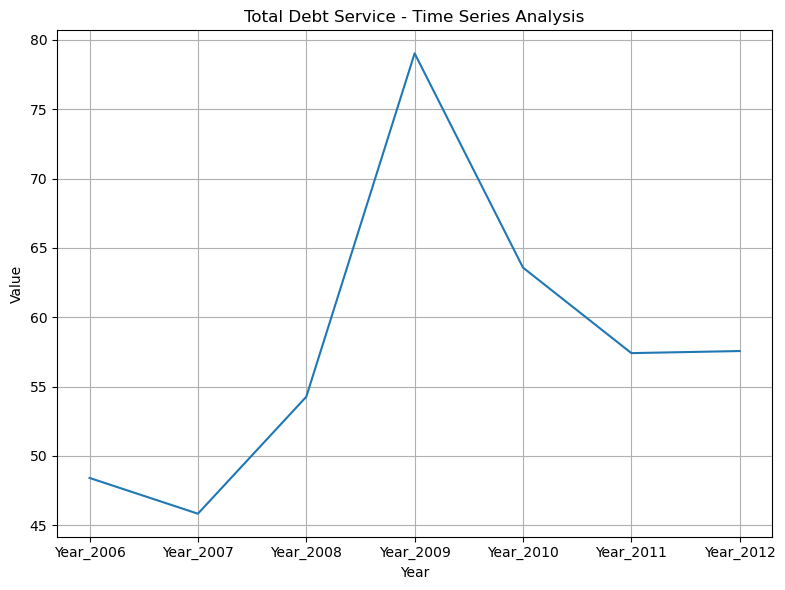

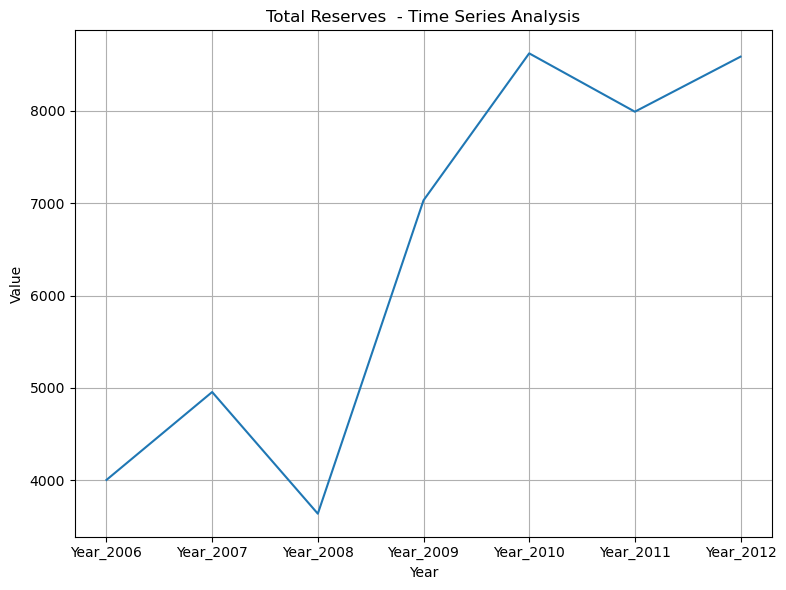

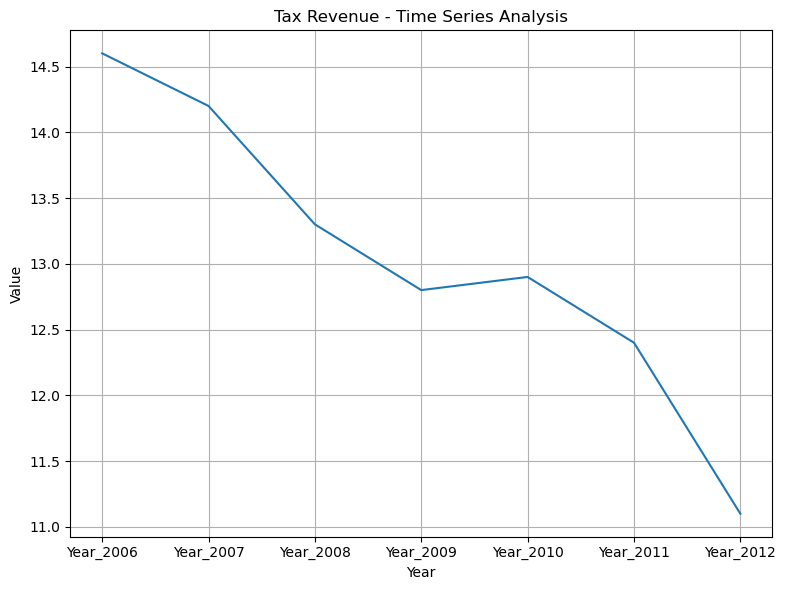

In [98]:
# Plot each types separately
for row in df.index:
    plt.figure(figsize=(8, 6))
    df.loc[row].plot()
    plt.title(f'{row} - Time Series Analysis')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

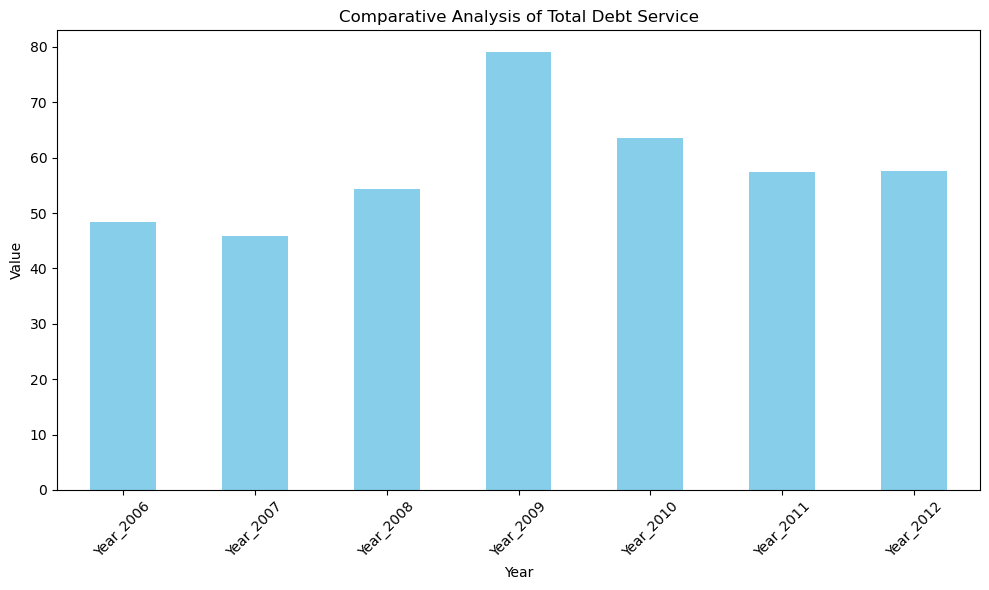

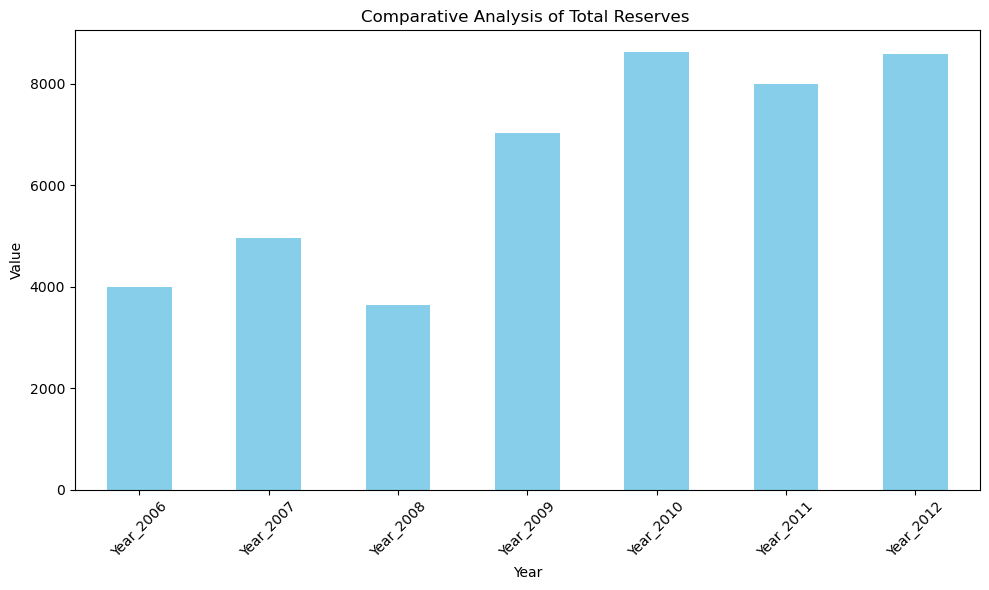

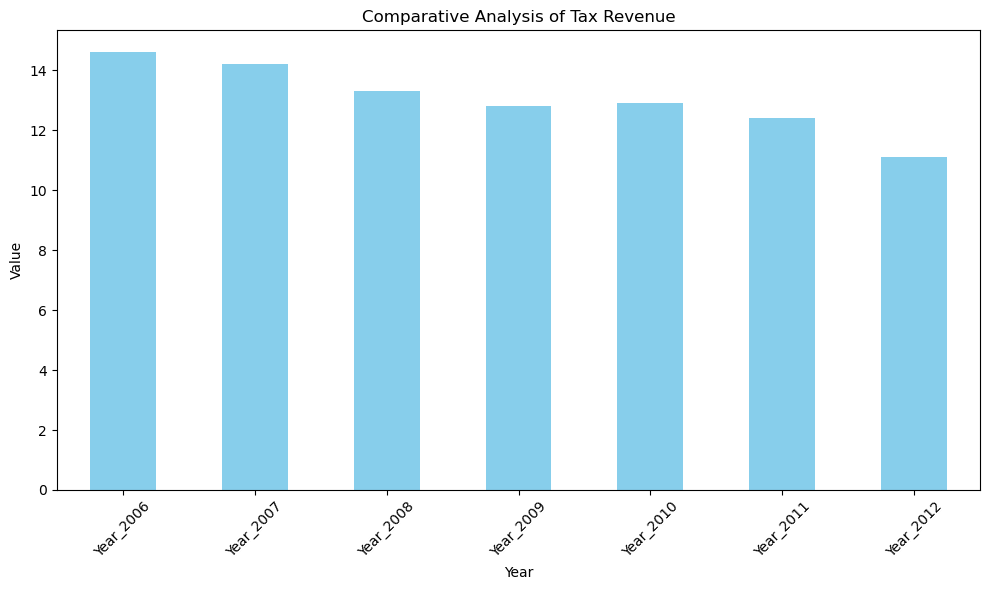

In [100]:
# Comparative Analysis for each row
for index, row in df.iterrows():
    plt.figure(figsize=(10, 6))
    row.plot(kind='bar', stacked=True, color='skyblue')
    plt.title(f'Comparative Analysis of {index}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Predictive Analysis:
predicting values for the next year based on the previous years.

In [110]:
df

,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012
Types,,,,,,,
Total Debt Service,48.407562,45.82853,54.258951,79.02521,63.57455,57.408537,57.558601
Total Reserves,4005.400000,4956.40000,3639.800000,7030.40000,8620.80000,7989.500000,8584.922580
Tax Revenue,14.600000,14.20000,13.300000,12.80000,12.90000,12.400000,11.100000


In [127]:
# Transpose the DataFrame
df_trans = df.transpose()

print(df_trans)

                            0               1            2
Types      Total Debt Service  Total Reserves  Tax Revenue
Year_2006           48.407562          4005.4         14.6
Year_2007            45.82853          4956.4         14.2
Year_2008           54.258951          3639.8         13.3
Year_2009            79.02521          7030.4         12.8
Year_2010            63.57455          8620.8         12.9
Year_2011           57.408537          7989.5         12.4
Year_2012           57.558601      8584.92258         11.1


In [121]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Your data
data = {
    'Types': ['Total Debt Service', 'Total Reserves', 'Tax Revenue'],
    'Year_2006': [48.407562, 4005.4, 14.6],
    'Year_2007': [45.82853, 4956.4, 14.2],
    'Year_2008': [54.258951, 3639.8, 13.3],
    'Year_2009': [79.02521, 7030.4, 12.8],
    'Year_2010': [63.57455, 8620.8, 12.9],
    'Year_2011': [57.408537, 7989.5, 12.4],
    'Year_2012': [57.558601, 8584.92258, 11.1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Separate features (years) and labels (values)
X_train = df.drop(['Types', 'Year_2012'], axis=1)  # Features (years)
y_train = df['Year_2012']  # Labels (values for the year 2012)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the year 2013
year_2013_features = X_train  # Assuming we're predicting based on the same features
year_2013_features['Year_2013'] = model.predict(X_train)  # Adding the predicted values for 2013

# Display the predicted values for 2013
print("Predicted values for the year 2013:")
print(year_2013_features)

Predicted values for the year 2013:
     Year_2006   Year_2007    Year_2008   Year_2009   Year_2010    Year_2011  \
0    48.407562    45.82853    54.258951    79.02521    63.57455    57.408537   
1  4005.400000  4956.40000  3639.800000  7030.40000  8620.80000  7989.500000   
2    14.600000    14.20000    13.300000    12.80000    12.90000    12.400000   

     Year_2013  
0    57.558601  
1  8584.922580  
2    11.100000  


# Prescriptive Analysis:

In [ ]:
Provided data is not enough for the Prescriptive analysis